In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Query Size with k=13

In [22]:
total = 64

In [23]:
## Range of Query Lengths
query_lengths = [i for i in range(16,22)]

In [24]:
## True positive count
tps = [12,12,9,17,6,17]
## True Negatives
tns = [(total-tp) for tp in tps]
## Corresponding False-Positive count
fps = [15, 10, 8, 3, 1, 0]

In [25]:
## Precision
tp_fp = [*zip(tps,fps)]
precision = [(tp/(tp+fp)) for tp, fp in tp_fp]
precision

[0.4444444444444444,
 0.5454545454545454,
 0.5294117647058824,
 0.85,
 0.8571428571428571,
 1.0]

In [26]:
## Specificity
tn_fp = [*zip(tns,fps)]
specificity = [(tn/(tn+fp)) for tn, fp in tn_fp]
specificity

[0.7761194029850746,
 0.8387096774193549,
 0.873015873015873,
 0.94,
 0.9830508474576272,
 1.0]

In [29]:
evalframe = pd.DataFrame(list(zip(query_lengths, precision, specificity)), columns=["Query Length","Precision","Specificity"])

In [30]:
evalframe

,Query Length,Precision,Specificity
0,16,0.444444,0.776119
1,17,0.545455,0.838710
2,18,0.529412,0.873016
3,19,0.850000,0.940000
4,20,0.857143,0.983051
5,21,1.000000,1.000000


[Text(0.5, 1.0, 'Precision vs Query Length (k=13)')]

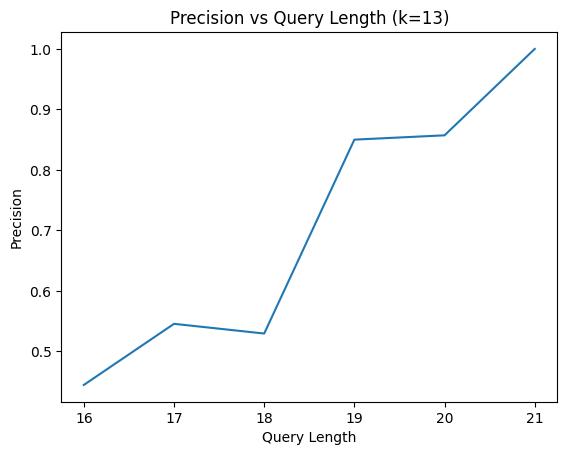

In [38]:
sns.lineplot(data=evalframe, x="Query Length", y="Precision").set(title="Precision vs Query Length (k=13)")

[Text(0.5, 1.0, 'Specificity vs Query Length (k=13)')]

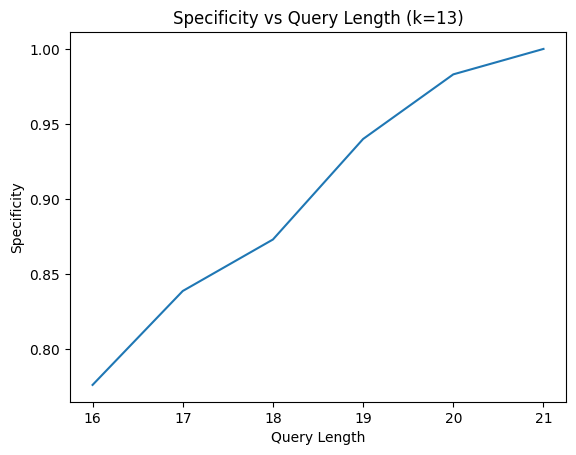

In [37]:
sns.lineplot(data=evalframe, x="Query Length", y="Specificity").set(title="Specificity vs Query Length (k=13)")

# kBioReg vs Prosite Scanner

In [9]:
benchmark_df = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/pdb_alphamods_results.csv")

In [6]:
benchmark_df["TOTAL"] = pd.Series(benchmark_df.LOAD+benchmark_df.SEARCH)

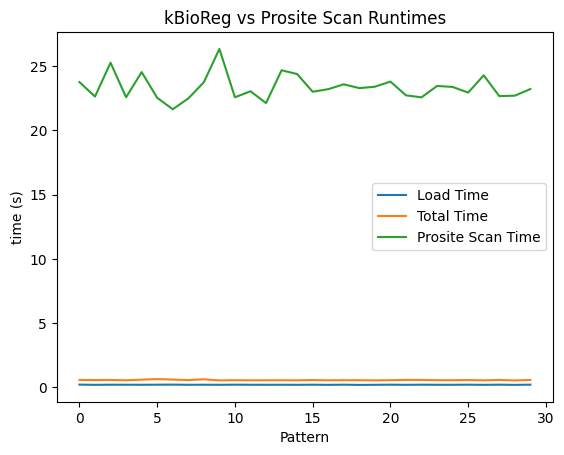

In [10]:
plt.title("kBioReg vs Prosite Scan Runtimes")

plt.plot(range(30), benchmark_df.LOAD, label="Load Time")
plt.plot(range(30), benchmark_df.TOTAL, label="Total Time")
plt.plot(range(30), benchmark_df.PS_SCAN, label="Prosite Scan Time")

plt.xlabel('Pattern')
plt.ylabel('time (s)')
plt.legend()
plt.savefig("pdb_scan.png")
plt.show()